### IMPORT LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import chi2_contingency
import scipy.stats as ss
from scipy.stats import pointbiserialr

### LOAD DATA

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', 2000)
sns.set_style('whitegrid')
plt.style.use('fivethirtyeight')
data = pd.read_csv('../data/Telco_customer_churn.csv', delimiter=",", engine="python")
data.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


### Data Understanding

In [3]:
print (f'Data shape: {data.shape}')

Data shape: (7043, 33)


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

| Column Name                    | Description                                                        |
| ------------------------------ | ------------------------------------------------------------------ |
| CustomerID                     | Unique ID for each customer                                        |
| Count                          | Number of data entries (usually 1 per customer)                    |
| Country                        | Country where the customer resides                                 |
| State                          | Province or region where the customer resides                      |
| City                           | City where the customer resides                                    |
| Zip Code                       | Customer’s postal code                                             |
| Lat Long                       | Combined latitude and longitude coordinates                        |
| Latitude                       | Latitude coordinate of the customer’s location                     |
| Longitude                      | Longitude coordinate of the customer’s location                    |
| Gender                         | Customer’s gender                                                  |
| Senior Citizen                 | Indicates if the customer is a senior citizen (1 = Yes, 0 = No)    |
| Partner                        | Indicates if the customer has a spouse or partner                  |
| Dependents                     | Indicates if the customer has dependents (children or parents)     |
| Tenure Months                  | Duration of subscription in months                                 |
| Phone Service                  | Whether the customer has a phone service                           |
| Multiple Lines                 | Whether the customer has multiple phone lines                      |
| Internet Service               | Type of internet service used (DSL, Fiber optic, or None)          |
| Online Security                | Whether the customer subscribes to online security service         |
| Online Backup                  | Whether the customer subscribes to online backup service           |
| Device Protection              | Whether the customer subscribes to device protection service       |
| Tech Support                   | Whether the customer has technical support service                 |
| Streaming TV                   | Whether the customer subscribes to streaming TV service            |
| Streaming Movies               | Whether the customer subscribes to streaming movie service         |
| Contract                       | Type of contract (Month-to-month, One year, or Two year)           |
| Paperless Billing              | Whether the customer uses paperless billing                        |
| Payment Method                 | Payment method used by the customer                                |
| Monthly Charges                | Monthly charges paid by the customer                               |
| Total Charges                  | Total charges paid by the customer throughout the subscription     |
| Churn Label                    | Customer churn status (Yes = churned, No = active)                 |
| Churn Value                    | Numeric churn indicator (1 = churned, 0 = not churned)             |
| Churn Score                    | Churn probability score (higher means higher churn risk)           |
| CLTV (Customer Lifetime Value) | Estimated total value of a customer over their entire relationship |
| Churn Reason                   | Reason why the customer stopped subscribing                        |


Variable types: 
- Customer ID is a unique variable. 
- Tenure Months, Monthly Charges, Total Charges, and CLTV are continuous numerical variables. 
- Churn Value and Churn Score are discrete numerical variables. 
- Contract is an ordinal categorical variable. 
- City, Gender, Senior Citizen, Partner, Dependents, Phone Service, Multiple Lines, Internet Service, Online Security, Online Backup, Device Protection, Tech Support, Streaming TV, Streaming Movies, Paperless Billing, Payment Method, Churn Label, and Churn Reason are numerical categorical variables.

In [5]:
data[['Count', 'Country', 'State']].value_counts()

Count  Country        State     
1      United States  California    7043
Name: count, dtype: int64

Feature Reduction Reasoning
- Dropped CustomerID → unique identifier, not analytically useful.
- Dropped Count, Country, State → constant or low-variance columns.
- Dropped Zip Code, Lat Long, Latitude, Longitude → redundant with City (geographic representation).

In [6]:
data.drop(columns=['CustomerID', 'Count', 'Lat Long', 'Zip Code', 'Latitude', 'Longitude', 'State', 'Country'], inplace=True)

### Check and Fix Data (if necessary)

In [7]:
#check objects data dtypes
categorical_columns = data.select_dtypes(include= 'object')

for column in categorical_columns:
    print(f"============= {column} =================")
    display(data[column].value_counts())
    print()

============= City =================


City
Los Angeles               305
San Diego                 150
San Jose                  112
Sacramento                108
San Francisco             104
Fresno                     64
Long Beach                 60
Oakland                    52
Stockton                   44
Bakersfield                40
Glendale                   40
Berkeley                   32
Riverside                  32
Pasadena                   30
Whittier                   30
Irvine                     28
San Bernardino             28
Santa Barbara              28
Anaheim                    28
Modesto                    28
Inglewood                  25
Torrance                   25
Santa Monica               25
Burbank                    25
Chula Vista                25
Santa Rosa                 24
Santa Ana                  24
Rancho Cucamonga           20
Escondido                  20
Salinas                    20
Van Nuys                   20
Orange                     20
Garden Grove               20
Coron


============= Gender =================


Gender
Male      3555
Female    3488
Name: count, dtype: int64


============= Senior Citizen =================


Senior Citizen
No     5901
Yes    1142
Name: count, dtype: int64


============= Partner =================


Partner
No     3641
Yes    3402
Name: count, dtype: int64


============= Dependents =================


Dependents
No     5416
Yes    1627
Name: count, dtype: int64


============= Phone Service =================


Phone Service
Yes    6361
No      682
Name: count, dtype: int64


============= Multiple Lines =================


Multiple Lines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64


============= Internet Service =================


Internet Service
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64


============= Online Security =================


Online Security
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64


============= Online Backup =================


Online Backup
No                     3088
Yes                    2429
No internet service    1526
Name: count, dtype: int64


============= Device Protection =================


Device Protection
No                     3095
Yes                    2422
No internet service    1526
Name: count, dtype: int64


============= Tech Support =================


Tech Support
No                     3473
Yes                    2044
No internet service    1526
Name: count, dtype: int64


============= Streaming TV =================


Streaming TV
No                     2810
Yes                    2707
No internet service    1526
Name: count, dtype: int64


============= Streaming Movies =================


Streaming Movies
No                     2785
Yes                    2732
No internet service    1526
Name: count, dtype: int64


============= Contract =================


Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64


============= Paperless Billing =================


Paperless Billing
Yes    4171
No     2872
Name: count, dtype: int64


============= Payment Method =================


Payment Method
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: count, dtype: int64


============= Total Charges =================


Total Charges
           11
20.2       11
19.75       9
19.9        8
20.05       8
19.65       8
19.55       7
45.3        7
20.15       6
19.45       6
20.25       6
20.3        5
20.45       5
75.3        4
69.65       4
69.6        4
19.5        4
74.7        4
70.6        4
20.4        4
44.4        4
49.9        4
50.15       4
19.4        4
69.9        4
20.5        4
69.95       4
44          4
20.35       4
19.95       4
19.3        4
19.85       4
19.2        4
74.35       3
44.75       3
70.45       3
55.7        3
45.7        3
69.55       3
74.6        3
74.9        3
20.1        3
24.8        3
70.15       3
69.25       3
50.6        3
74.3        3
69.1        3
84.5        3
1284.2      3
2317.1      3
45.1        3
19.25       3
20          3
45.85       3
20.9        3
50.45       3
19.1        3
50.75       3
75.35       3
70.1        3
470.2       3
305.55      3
85          3
20.55       3
86.05       3
79.55       3
85.5        3
80.55       3
25.25       3
383.65


============= Churn Label =================


Churn Label
No     5174
Yes    1869
Name: count, dtype: int64


============= Churn Reason =================


Churn Reason
Attitude of support person                   192
Competitor offered higher download speeds    189
Competitor offered more data                 162
Don't know                                   154
Competitor made better offer                 140
Attitude of service provider                 135
Competitor had better devices                130
Network reliability                          103
Product dissatisfaction                      102
Price too high                                98
Service dissatisfaction                       89
Lack of self-service on Website               88
Extra data charges                            57
Moved                                         53
Lack of affordable download/upload speed      44
Limited range of services                     44
Long distance charges                         44
Poor expertise of phone support               20
Poor expertise of online support              19
Deceased                                       6
Name: c

### PREPOCESSING DATA

In [8]:
#fix Total Charges column
data['Total Charges'] = pd.to_numeric(data['Total Charges'], errors='coerce')

In [9]:
# Normalize categorical values:
# Replace "No internet service" and "No phone service" with "No" 
# to simplify categories and reduce redundancy in service-related columns.
data['Streaming Movies'] = data['Streaming Movies'].replace({'No internet service':'No'})
data['Streaming TV'] = data['Streaming TV'].replace({'No internet service':'No'})
data['Tech Support'] = data['Tech Support'].replace({'No internet service':'No'})
data['Device Protection'] = data['Device Protection'].replace({'No internet service':'No'})
data['Online Backup'] = data['Online Backup'].replace({'No internet service':'No'})
data['Online Security'] = data['Online Security'].replace({'No internet service':'No'})
data['Multiple Lines'] = data['Multiple Lines'].replace({'No phone service':'No'})

In [10]:
# cek column after normalize
custom_kolom = ['Streaming Movies', 'Streaming TV', 'Tech Support', 'Device Protection', 'Online Backup', 'Online Security', 'Multiple Lines']
for column in custom_kolom:
    print(f"============= {column} =================")
    display(data[column].value_counts())
    print()

============= Streaming Movies =================


Streaming Movies
No     4311
Yes    2732
Name: count, dtype: int64


============= Streaming TV =================


Streaming TV
No     4336
Yes    2707
Name: count, dtype: int64


============= Tech Support =================


Tech Support
No     4999
Yes    2044
Name: count, dtype: int64


============= Device Protection =================


Device Protection
No     4621
Yes    2422
Name: count, dtype: int64


============= Online Backup =================


Online Backup
No     4614
Yes    2429
Name: count, dtype: int64


============= Online Security =================


Online Security
No     5024
Yes    2019
Name: count, dtype: int64


============= Multiple Lines =================


Multiple Lines
No     4072
Yes    2971
Name: count, dtype: int64

### Data Cleaning

In [11]:
# Check for duplicate records to ensure data integrity
len(data.drop_duplicates()) / len(data)

1.0

Result = 1 → No duplicated rows found


In [12]:
# check missing value
data.isna().sum()

City                    0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges          11
Churn Label             0
Churn Value             0
Churn Score             0
CLTV                    0
Churn Reason         5174
dtype: int64

There are 11 missing values in the **Total Charges** column and 5174 missing values in the **Churn Reason** column.

In [13]:
# Handling Missing Values
# Calculate the median of the 'Total Charges' column, excluding -1 or NaN values
median_Total_Charges = data[(data['Total Charges'] != -1) & (~data['Total Charges'].isna())]['Total Charges'].median()
print(f'Median Total Charges = {median_Total_Charges}')

Median Total Charges = 1397.475


In [14]:
# Replacing missing or invalid values (-1, NaN) in 'Total Charges' 
# with the median value calculated earlier
data['Total Charges'] = data['Total Charges'].apply(lambda x: median_Total_Charges if x == -1 or pd.isna(x) else x)
print("Remaining missing values in 'Total Charges':", data['Total Charges'].isna().sum())

Remaining missing values in 'Total Charges': 0


In [15]:
# checking missing value column Churn Reason
data.groupby('Churn Label')['Churn Reason'].apply(lambda x: x.isna().sum())

Churn Label
No     5174
Yes       0
Name: Churn Reason, dtype: int64

Missing values are found in the 'Churn Reason' column. However, these missing values exist because the customers did not churn, meaning there is no reason recorded for contract termination. Therefore, this column will not be dropped, but rather kept as additional insight for further analysis.

### Continuous Variables Summary & Normality Approximation

In [16]:
data.describe()

,Tenure Months,Monthly Charges,Total Charges,Churn Value,Churn Score,CLTV
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2281.916928,0.265370,58.699418,4400.295755
std,24.559481,30.090047,2265.270398,0.441561,21.525131,1183.057152
min,0.000000,18.250000,18.800000,0.000000,5.000000,2003.000000
25%,9.000000,35.500000,402.225000,0.000000,40.000000,3469.000000
50%,29.000000,70.350000,1397.475000,0.000000,61.000000,4527.000000
75%,55.000000,89.850000,3786.600000,1.000000,75.000000,5380.500000
max,72.000000,118.750000,8684.800000,1.000000,100.000000,6500.000000


In [17]:
kolom_kontinu = data[['Monthly Charges','CLTV','Tenure Months','Total Charges']]

In [18]:
summary = (kolom_kontinu.apply(lambda col: pd.Series({
                 'mean': col.mean(),
                 'median': col.median(),
                 'min': col.min(),
                 'max': col.max(),
                 'pct': abs(col.mean() - col.median()) / (col.max() - col.min()) * 100,
                 'distribusi': 'Normal' if abs(col.mean() - col.median()) / (col.max() - col.min()) * 100 < 5 else 'Skewed' # with proximate =< 5 %
             }))
            ).T 
print(summary)

                        mean    median    min     max        pct distribusi
Monthly Charges    64.761692     70.35  18.25  118.75   5.560505     Skewed
CLTV             4400.295755    4527.0   2003    6500   2.817528     Normal
Tenure Months      32.371149      29.0      0      72   4.682151     Normal
Total Charges    2281.916928  1397.475   18.8  8684.8  10.205884     Skewed


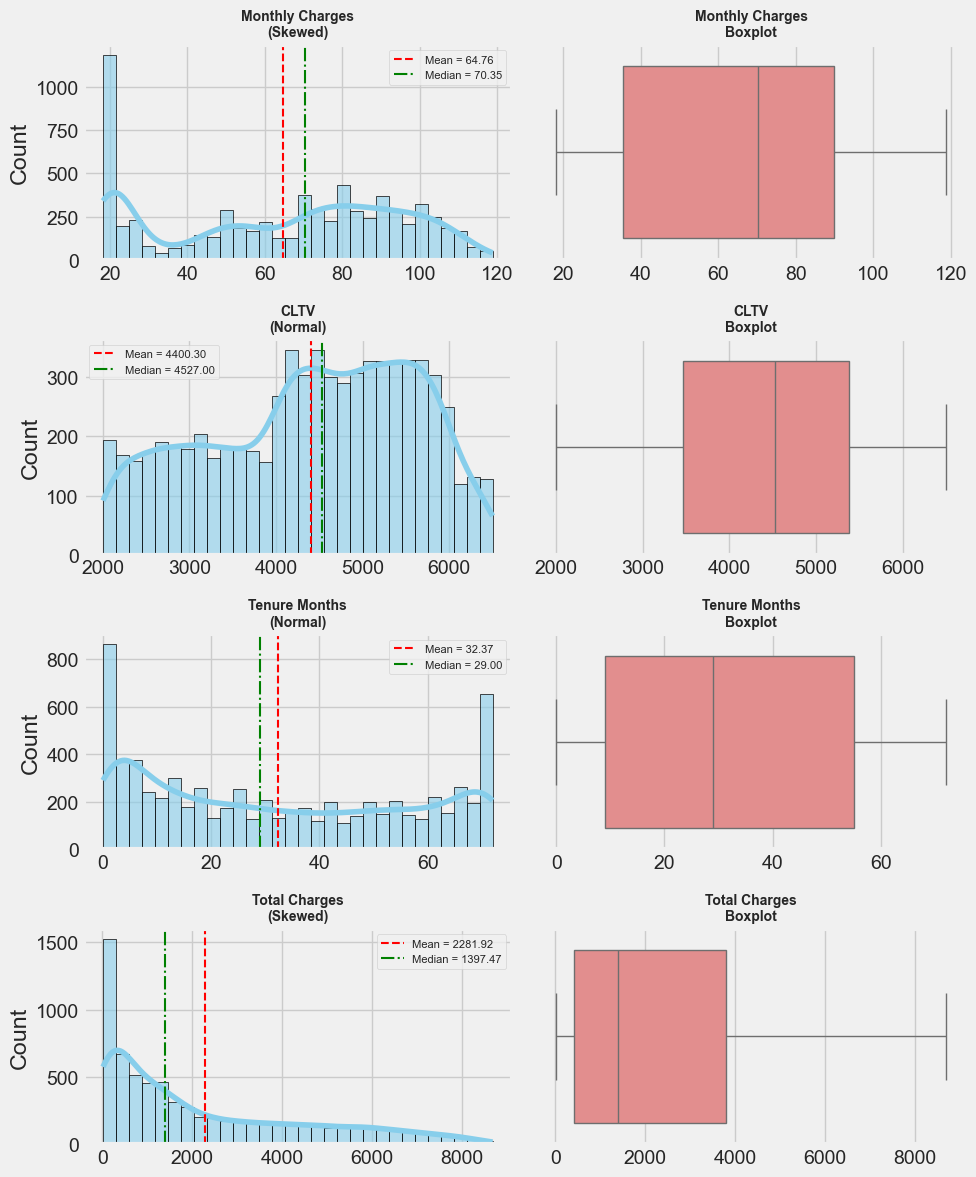

In [19]:
cols = summary.index.tolist()
n = len(cols)
ncols = 2
nrows = n

plt.figure(figsize=(10, 3 * nrows))

for i, col in enumerate(cols):
    s = data[col].dropna()

    # Histogram
    ax_hist = plt.subplot(nrows, ncols, i*ncols + 1)
    sns.histplot(s, bins=30, kde=True, color='skyblue', edgecolor='k', alpha=0.6, ax=ax_hist)
    mean_val = summary.loc[col, 'mean']
    median_val = summary.loc[col, 'median']
    ax_hist.axvline(mean_val, color='red', linestyle='--', linewidth=1.5, label=f"Mean = {mean_val:.2f}")
    ax_hist.axvline(median_val, color='green', linestyle='-.', linewidth=1.5, label=f"Median = {median_val:.2f}")

    status = summary.loc[col, 'distribusi']
    ax_hist.set_title(f"{col}\n({status})", fontsize=10, fontweight='bold')
    ax_hist.set_xlabel("")
    ax_hist.legend(fontsize=8)

    # Boxplot
    ax_box = plt.subplot(nrows, ncols, i*ncols + 2)
    sns.boxplot(x=s, color='lightcoral', orient='h', ax=ax_box)
    ax_box.set_xlabel("")
    ax_box.set_title(f"{col}\nBoxplot", fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()


- Monthly Charges show a left-skewed (negatively skewed) distribution, with a median (70.35) slightly higher than the mean (64.76). This shape indicates that most customers pay monthly bills in the higher price range, while a small group of customers with very low charges pulls the average downward. The boxplot confirms that the main spread of the data is centered and relatively tight.
- The distribution of CLTV (Customer Lifetime Value) appears to be approximately normal, as shown by the close proximity between the mean (4400.30) and median (4527.00). This normality suggests that CLTV values are symmetrically distributed around the center, meaning most customers have an average lifetime value. It also implies that CLTV is a stable variable and suitable for modeling purposes.
- Tenure Months displays a U-shaped distribution, with a mean of 32.37 and a median of 29.00. The distribution has two noticeable peaks—one among newly joined customers and another among long-term loyal customers. This pattern highlights two distinct customer segments: those in the early stage of their subscription and those with long-standing loyalty.
- The Total Charges variable shows a right-skewed (positively skewed) distribution, characterized by a sharp peak near zero and a long tail to the right. The large gap between the mean (2281.92) and median (1397.47) reinforces this skewness. This suggests that most customers are either new or have a short tenure, resulting in low total charges, while a smaller segment of long-term or high-paying customers raises the overall average.

### To understand why customers decide to leave the service, several variable groups can be explored:
- Demographic Factors:
City, Gender, Senior Citizen, Partner, and Dependents 👉 these variables describe the customer’s background and lifestyle, which may influence loyalty patterns.
- Service Usage:
Phone Service, Multiple Lines, Internet Service, Online Security, Online Backup, Device Protection, Tech Support, Streaming TV, and Streaming Movies 👉 these reflect how customers interact with the company’s core services.
- Contract & Payment Behavior:
Contract type, Paperless Billing, and Payment Method 👉 these define the customer’s engagement model and convenience in transactions.
- Financial & Behavioral Metrics:
Tenure Months, Monthly Charges, Total Charges, and CLTV 👉 indicators of customer spending habits and value over time.
- Outcome & Reasoning:
Churn Value, Churn Score, Churn Label, and Churn Reason 👉 key outcome variables that help explain and quantify customer churn.


### 1️⃣ How Significant Is Customer Churn?
The first step is to understand the scale of the issue, how many customers have churned compared to those who stayed.  
This gives us an overview of how serious the churn problem is for the company.


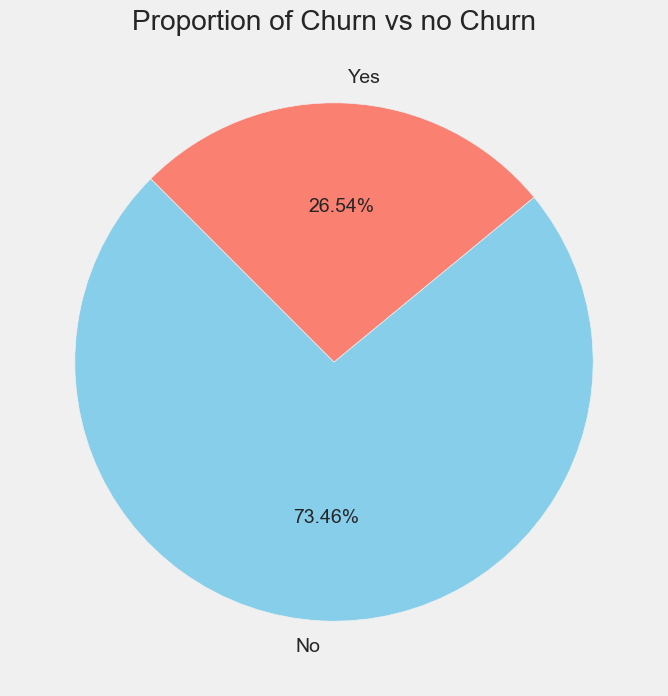

In [20]:
# Calculate churn proportion
propotion_churn = data['Churn Label'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(propotion_churn, labels=propotion_churn.index, autopct='%1.2f%%', startangle=135, colors=['skyblue', 'salmon'])
plt.title('Proportion of Churn vs no Churn')
plt.show()

Most customers remain loyal, but around 25% have churned a considerable figure that could meaningfully affect the company’s revenue and customer retention metrics

### 2️⃣ Why Do Customers Leave?
The next step is to explore the key reasons behind customer churn.

C:\Users\majel\AppData\Local\Temp\ipykernel_12228\479570802.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_reason_counts.values, y=churn_reason_counts.index, palette='viridis')


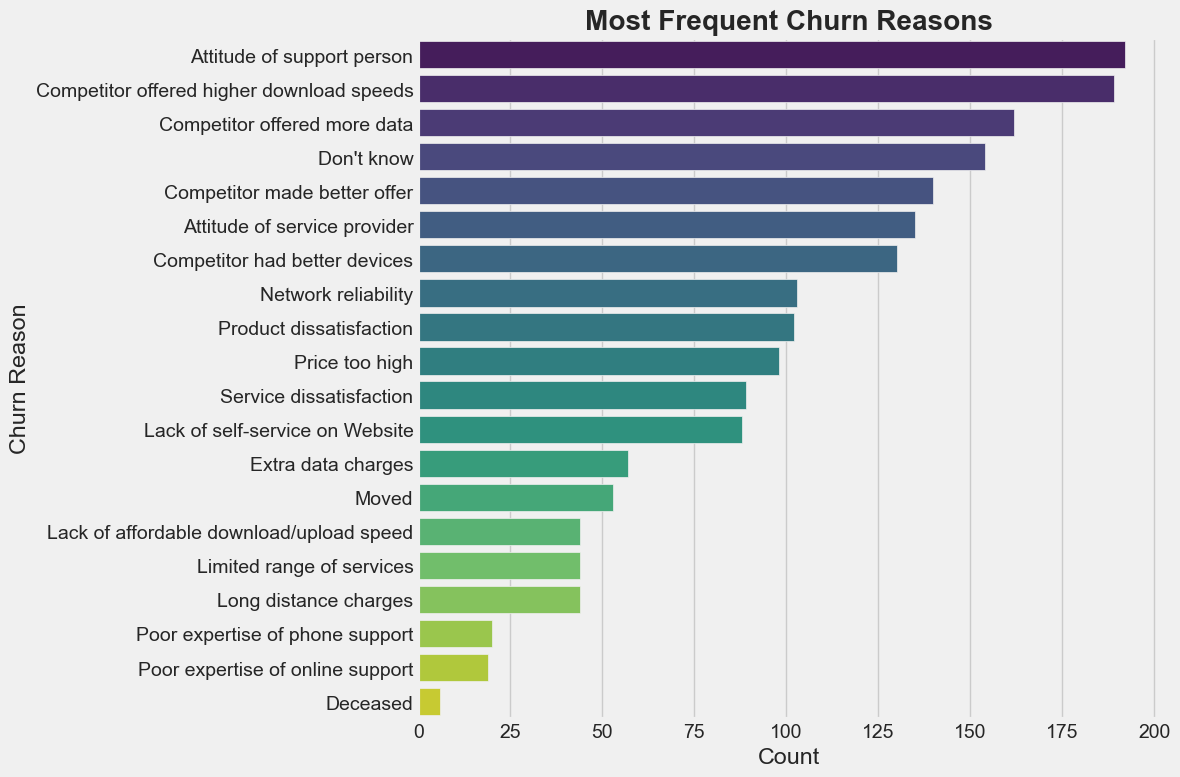

In [21]:
churn_reason_counts = data['Churn Reason'].value_counts().sort_values(ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x=churn_reason_counts.values, y=churn_reason_counts.index, palette='viridis')
plt.xlabel('Count')
plt.ylabel('Churn Reason')
plt.title('Most Frequent Churn Reasons', fontweight='bold')
plt.tight_layout()
plt.show()

Most churned customers left due to poor customer support and better offers from competitors. This highlights that the company’s main challenge is not only internal service quality but also external market competitiveness.

### 3️⃣ Financial Impact (Revenue Loss)
To understand how churn affects the company financially, we estimate the potential revenue loss caused by customers who stopped their subscriptions.

In [22]:
# take customer churners
churners = data[data['Churn Label'] == 'Yes'].copy()

# Monthly loss
monthly_loss = churners['Monthly Charges'].sum()

# Yearly loss 
yearly_loss = monthly_loss * 12

# Estimasi future loss based on expected remaining months
avg_tenure_nonchurn = data[data['Churn Label'] == 'No']['Tenure Months'].mean()

# calculate expected remaining months
churners['expected_remaining_months'] = (avg_tenure_nonchurn - churners['Tenure Months']).clip(lower=0)

# Total estimated future revenue loss
churners['estimated_future_loss'] = churners['Monthly Charges'] * churners['expected_remaining_months']
future_loss_total = churners['estimated_future_loss'].sum()

# result
print(f"Monthly revenue loss from current churners: {monthly_loss:,.2f}")
print(f"Yearly revenue loss from current churners: {yearly_loss:,.2f}")
print(f"Estimated future revenue loss (based on expected tenure): {future_loss_total:,.2f}")


Monthly revenue loss from current churners: 139,130.85
Yearly revenue loss from current churners: 1,669,570.20
Estimated future revenue loss (based on expected tenure): 2,859,571.50


C:\Users\majel\AppData\Local\Temp\ipykernel_12228\454312295.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Period', y='Revenue Loss', data=df_loss, palette='viridis')


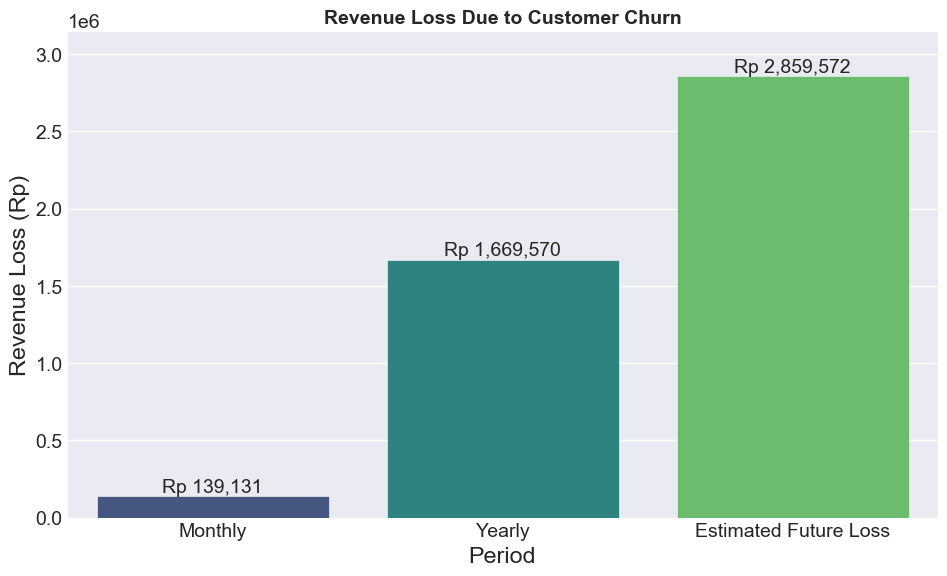

In [23]:
# Data for the bar chart including estimated future loss
loss_data = {
    'Period': ['Monthly', 'Yearly', 'Estimated Future Loss'],
    'Revenue Loss': [monthly_loss, yearly_loss, future_loss_total]
}
df_loss = pd.DataFrame(loss_data)

# Use a style for a better background
plt.style.use('seaborn-v0_8-darkgrid')

# Create the bar chart
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Period', y='Revenue Loss', data=df_loss, palette='viridis')

# Add data labels on top of the bars
for container in ax.containers:
    ax.bar_label(container, fmt='Rp {:,.0f}', label_type='edge')

# Adjust the y-axis limits to add some space above the tallest bar
plt.ylim(0, df_loss['Revenue Loss'].max() * 1.1)

# Titles and labels
plt.title('Revenue Loss Due to Customer Churn', fontweight='bold', fontsize=14)
plt.xlabel('Period')
plt.ylabel('Revenue Loss (Rp)')

plt.show()


customer churn has a substantial financial impact on the company. Currently, the company is losing approximately USD 139,131 per month, which translates to around USD 1,669,570 annually. Furthermore, considering the expected remaining lifetime of churned customers, the total estimated future revenue loss amounts to USD 2,859,572.

### 🔍 4️⃣ Analysis of Key Drivers of Customer Churn

After assessing the financial impact, the next step is to identify the **primary factors influencing customer churn**.  
The analysis focuses on three main perspectives:

1. **Demographic Factors**
2. **Service-Related Factors**
3. **Financial Factors**

This structured approach provides a clear framework to understand why customers are leaving and helps guide targeted retention strategies.


#### 🧍‍♂️ Demographic Factors
The analysis begins with customer demographics, including regional distribution and basic characteristics such as gender, senior citizen status, and household composition.


In [24]:
city_churn_counts = data.groupby(['City', 'Churn Label']).size().unstack(fill_value=0)

city_churn_yes = city_churn_counts['Yes'].sort_values(ascending=False)

display(city_churn_yes.head(10))

City
Los Angeles      90
San Diego        50
San Francisco    31
San Jose         29
Sacramento       26
Fresno           16
Long Beach       15
Oakland          13
Glendale         13
Stockton         12
Name: Yes, dtype: int64

In [25]:
total_churn = data['Churn Value'].sum()
top_10_churn_cities_count = city_churn_yes.head(10).sum()
percentage_contribution = (top_10_churn_cities_count / total_churn) * 100

C:\Users\majel\AppData\Local\Temp\ipykernel_12228\932118810.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=city_churn_yes.head(10).index, y=city_churn_yes.head(10).values, palette='viridis')


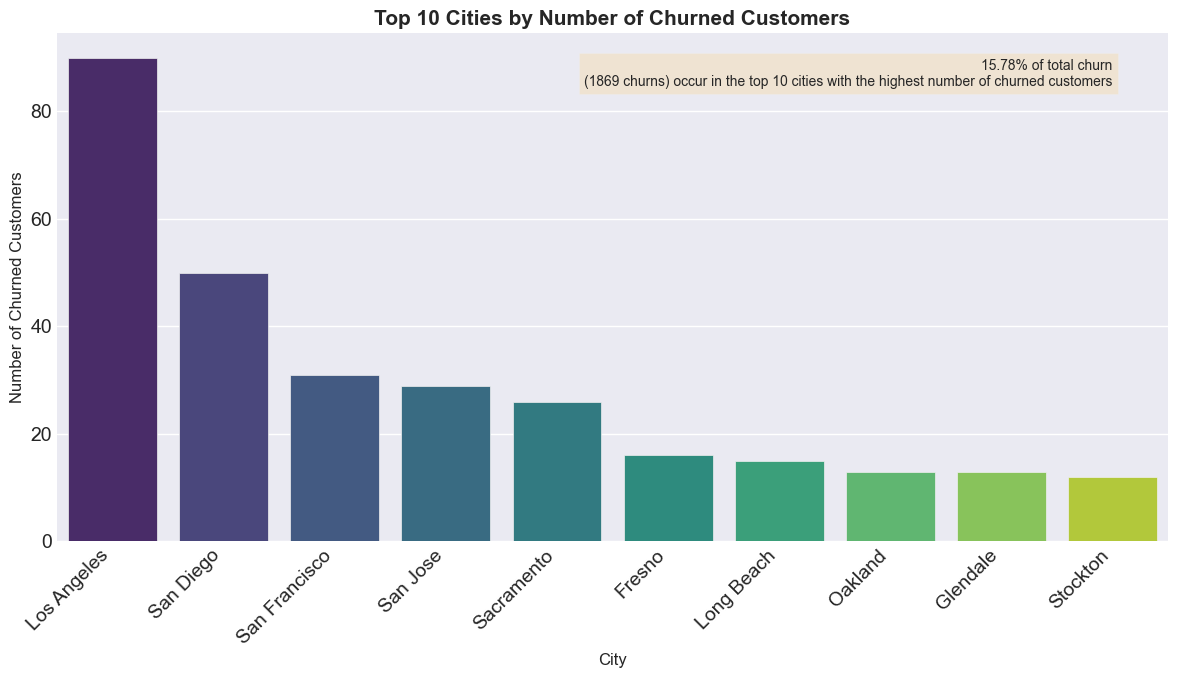

In [26]:
plt.figure(figsize=(12, 7))
ax = sns.barplot(x=city_churn_yes.head(10).index, y=city_churn_yes.head(10).values, palette='viridis')
ax.set_xlabel('City', fontsize=12)
ax.set_ylabel('Number of Churned Customers', fontsize=12)
ax.set_title('Top 10 Cities by Number of Churned Customers', fontsize=15, fontweight='bold')
plt.xticks(rotation=45, ha='right')

# Add notation
percentage_contribution = (top_10_churn_cities_count / total_churn) * 100
annotation_text = f"{percentage_contribution:.2f}% of total churn\n({total_churn} churns) occur in the top 10 cities with the highest number of churned customers"
ax.text(0.95, 0.95, annotation_text, transform=ax.transAxes, fontsize=10,
        verticalalignment='top', horizontalalignment='right',
        bbox=dict(fc='wheat', alpha=0.5))

plt.tight_layout()
plt.show()

Most churned customers are located in Los Angeles, followed by San Diego and San Francisco. However, the top 10 cities account for only 15% of total churn, indicating that geographic location is not the primary driver of churn and that churn is more widely distributed across different cities.

In [27]:
gender_churn = data.groupby(['Gender','Churn Label']).size().unstack(fill_value=0)[['No','Yes']]
gender_churn_prop = gender_churn.div(gender_churn.sum(axis=1), axis=0)

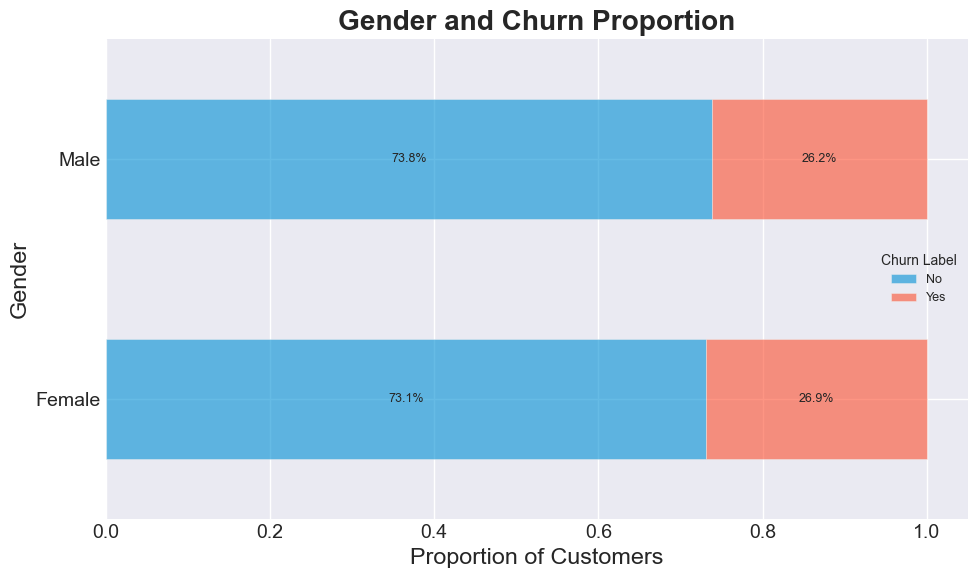

In [28]:
ax = gender_churn_prop.plot(kind='barh', stacked=True, figsize=(10, 6), alpha=0.6)
ax.set_xlabel('Proportion of Customers')
ax.set_ylabel('Gender')
ax.set_title('Gender and Churn Proportion', fontweight='bold')

ax.legend(title='Churn Label', fontsize=9, title_fontsize=10)
for container in ax.containers:
    labels = [f'{w:.1%}' if (w := v.get_width()) > 0 else '' for v in container]
    ax.bar_label(container, labels=labels, label_type='center', fontsize=9)

plt.tight_layout()
plt.show()

The gender distribution among churned customers is relatively balanced, indicating that gender does not significantly influence churn risk. In other words, gender is not a primary factor driving customer churn.

In [29]:
# Create a contingency table for Senior Citizen vs Churn
contingency_table_senior_churn = pd.crosstab(data['Senior Citizen'], data['Churn Label'])

# Perform Chi-Square test
chi2_stat_senior, p_value_senior, dof_senior, expected_senior = chi2_contingency(contingency_table_senior_churn)

print(f"Chi-Square Statistic (Senior Citizen vs Churn): {chi2_stat_senior}")
print(f"P-value (Senior Citizen vs Churn): {p_value_senior}")

# Interpret the result
alpha = 0.05
if p_value_senior < alpha:
    print("\nChi-Square Test Result: There is a significant association between Senior Citizen status and Churn Label.")
else:
    print("\nChi-Square Test Result: There is no significant association between Senior Citizen status and Churn Label.")

Chi-Square Statistic (Senior Citizen vs Churn): 159.42630036838742
P-value (Senior Citizen vs Churn): 1.510066805092378e-36

Chi-Square Test Result: There is a significant association between Senior Citizen status and Churn Label.


In [30]:
# Create a contingency table for Partner vs Churn
contingency_table_partner_churn = pd.crosstab(data['Partner'], data['Churn Label'])

# Perform Chi-Square test
chi2_stat_partner, p_value_partner, dof_partner, expected_partner = chi2_contingency(contingency_table_partner_churn)

print(f"Chi-Square Statistic (Partner vs Churn): {chi2_stat_partner}")
print(f"P-value (Partner vs Churn): {p_value_partner}")

# Interpret the result
alpha = 0.05
if p_value_partner < alpha:
    print("\nChi-Square Test Result: There is a significant association between Partner status and Churn Label.")
else:
    print("\nChi-Square Test Result: There is no significant association between Partner status and Churn Label.")


Chi-Square Statistic (Partner vs Churn): 158.7333820309922
P-value (Partner vs Churn): 2.1399113440759935e-36

Chi-Square Test Result: There is a significant association between Partner status and Churn Label.


In [31]:
# Create a contingency table for Dependents vs Churn
contingency_table_dependents_churn = pd.crosstab(data['Dependents'], data['Churn Label'])

# Perform Chi-Square test
chi2_stat_dependents, p_value_dependents, dof_dependents, expected_dependents = chi2_contingency(contingency_table_dependents_churn)

print(f"Chi-Square Statistic (Dependents vs Churn): {chi2_stat_dependents}")
print(f"P-value (Dependents vs Churn): {p_value_dependents}")

# Interpret the result
alpha = 0.05
if p_value_dependents < alpha:
    print("\nChi-Square Test Result: There is a significant association between Dependents status and Churn Label.")
else:
    print("\nChi-Square Test Result: There is no significant association between Dependents status and Churn Label.")


Chi-Square Statistic (Dependents vs Churn): 433.7343787644573
P-value (Dependents vs Churn): 2.5009723998553557e-96

Chi-Square Test Result: There is a significant association between Dependents status and Churn Label.


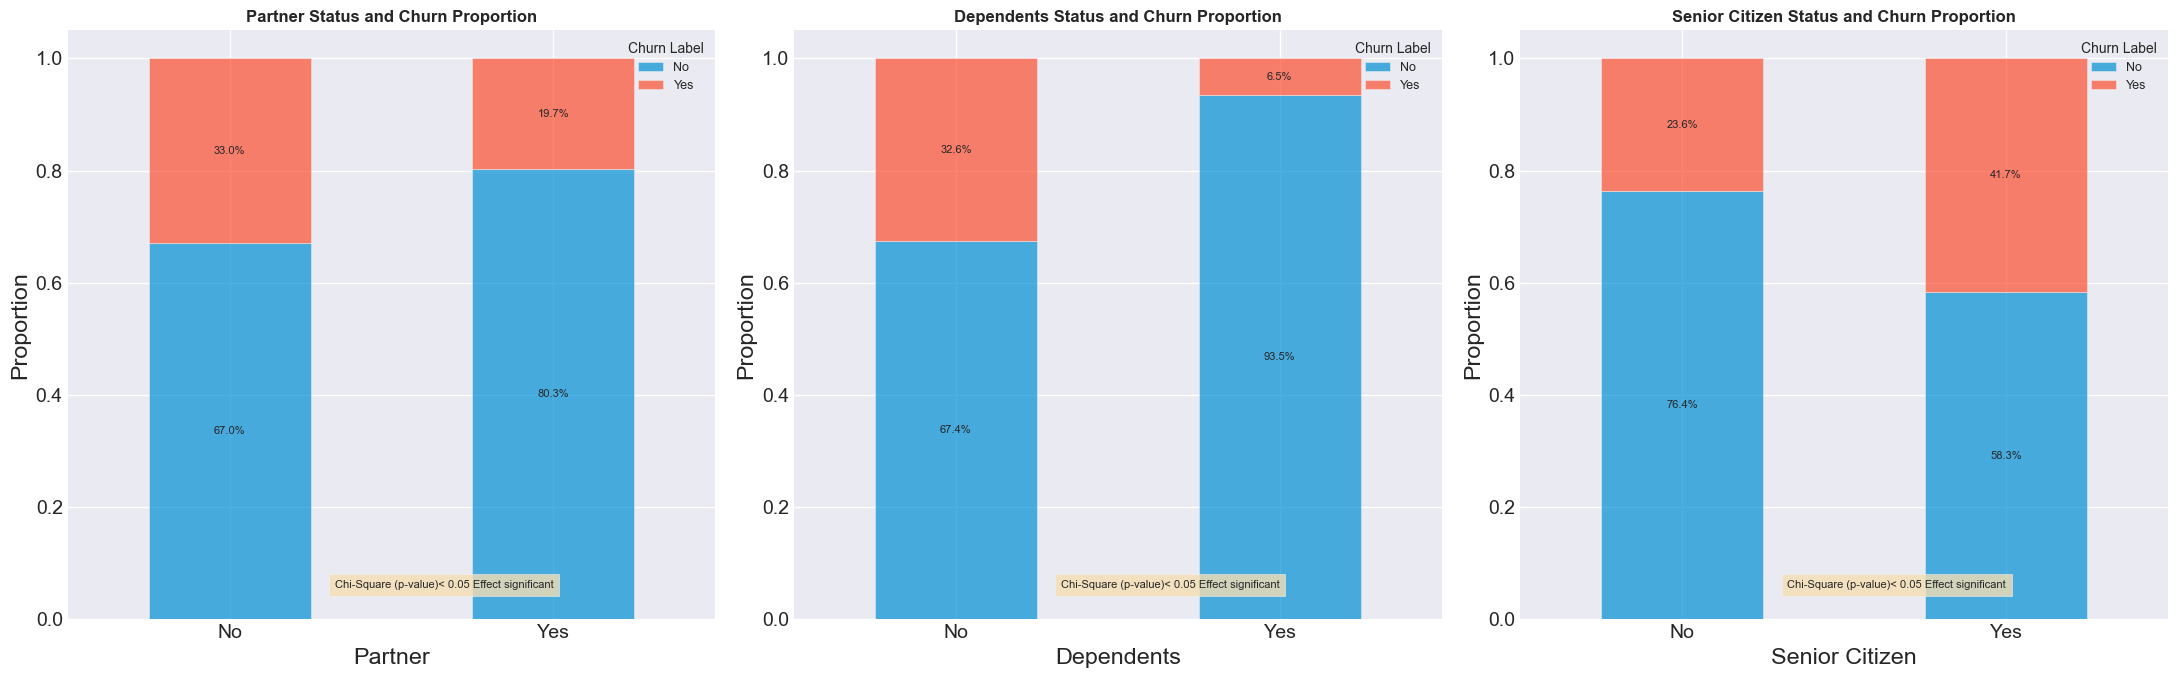

In [32]:
# Function to plot stacked bar chart and add chi-square test interpretation
def plot_demographic_churn(data, column, ax, title, alpha=0.05):
    churn_counts = data.groupby([column, 'Churn Label']).size().unstack(fill_value=0)[['No', 'Yes']]
    churn_prop = churn_counts.div(churn_counts.sum(axis=1), axis=0)

    churn_prop.plot(kind='bar', stacked=True, ax=ax, alpha=0.7)

    ax.set_xlabel(column)
    ax.set_ylabel('Proportion')
    ax.set_title(title, fontweight='bold', fontsize=12) # Increase title font size
    ax.legend(title='Churn Label', fontsize=9, title_fontsize=10, loc='upper right')

    for container in ax.containers:
        labels = [f'{w:.1%}' if (w := v.get_height()) > 0 else '' for v in container]
        ax.bar_label(container, labels=labels, label_type='center', fontsize=8)

    # Perform Chi-Square test and add interpretation
    contingency_table = pd.crosstab(data[column], data['Churn Label'])
    chi2_statistic, p_value, dof, expected = chi2_contingency(contingency_table)

    # Update interpretation text
    interpretation = "significant" if p_value < alpha else "not significant"
    ax.text(0.75, 0.05, f"Chi-Square (p-value)< {alpha} Effect {interpretation}",
            transform=ax.transAxes, fontsize=8,
            verticalalignment='bottom', horizontalalignment='right',
            bbox=dict(fc='wheat', alpha=0.8))

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(22, 7)) # Increase figure size

# Plot for Partner
plot_demographic_churn(data, 'Partner', axes[0], 'Partner Status and Churn Proportion')
axes[0].tick_params(axis='x', rotation=0)

# Plot for Dependents
plot_demographic_churn(data, 'Dependents', axes[1], 'Dependents Status and Churn Proportion')
axes[1].tick_params(axis='x', rotation=0)


# Plot for Senior Citizen
plot_demographic_churn(data, 'Senior Citizen', axes[2], 'Senior Citizen Status and Churn Proportion')
axes[2].tick_params(axis='x', rotation=0)


plt.tight_layout()
plt.show()

Chi-Square tests (p < 0.05) show that partner status, dependents, and senior citizen status significantly affect churn. Customers with a partner or dependents have lower churn rates (19.7% and 6.5%, respectively), while senior citizens face the highest churn risk (41.7%). These results indicate that family and social ties reduce churn, whereas seniors may require personalized service strategies to improve retention.

### 🌐 Service Related Factors

The analysis focuses on the types of services used by customers, including **phone service, internet service, contract type, and payment method**.


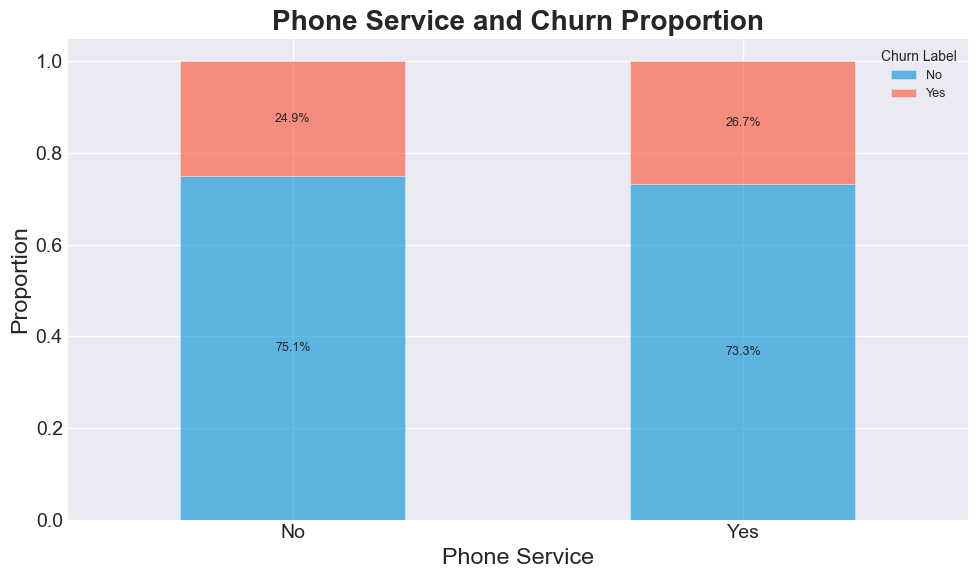

In [33]:
phone_churn = data.groupby(['Phone Service', 'Churn Label']).size().unstack(fill_value=0)[['No', 'Yes']]
phone_churn_prop = phone_churn.div(phone_churn.sum(axis=1), axis=0)

ax = phone_churn_prop.plot(kind='bar', stacked=True, figsize=(10, 6), alpha=0.6)
ax.set_xlabel('Phone Service')
ax.set_ylabel('Proportion')
ax.set_title('Phone Service and Churn Proportion', fontweight='bold')

ax.legend(title='Churn Label', fontsize=9, title_fontsize=10)
for container in ax.containers:
    labels = [f'{w:.1%}' if (w := v.get_height()) > 0 else '' for v in container]
    ax.bar_label(container, labels=labels, label_type='center', fontsize=9)

plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

The proportion of customers using or not using phone service is relatively balanced with respect to churn. However, slightly more customers subscribe to phone service.

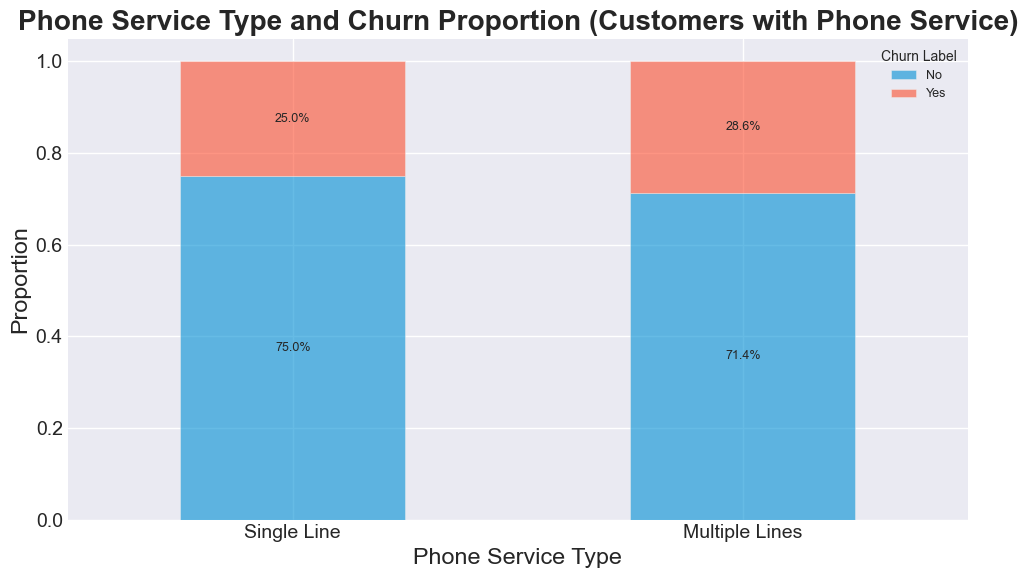

In [34]:
phone_service_df = data[data['Phone Service'] == 'Yes'].copy()


multiple_lines_churn = phone_service_df.groupby(['Multiple Lines', 'Churn Label']).size().unstack(fill_value=0)[['No', 'Yes']]
multiple_lines_churn_prop = multiple_lines_churn.div(multiple_lines_churn.sum(axis=1), axis=0)

ax = multiple_lines_churn_prop.plot(kind='bar', stacked=True, figsize=(10, 6), alpha=0.6)

ax.set_xticklabels(['Single Line', 'Multiple Lines'])
ax.set_xlabel('Phone Service Type')
ax.set_ylabel('Proportion')
ax.set_title('Phone Service Type and Churn Proportion (Customers with Phone Service)', fontweight='bold')

ax.legend(title='Churn Label', fontsize=9, title_fontsize=10)
for container in ax.containers:
    labels = [f'{w:.1%}' if (w := v.get_height()) > 0 else '' for v in container]
    ax.bar_label(container, labels=labels, label_type='center', fontsize=9)

plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Customers with either a single or multiple phone lines show a balanced churn response, suggesting that the number of phone lines is unlikely to be a significant factor in churn.

In [35]:
internet_churn = data.groupby(['Internet Service','Churn Label']).size().unstack(fill_value=0)[['No','Yes']]
internet_churn_prop = internet_churn.div(internet_churn.sum(axis=1), axis=0)
internet_churn

Churn Label,No,Yes
Internet Service,,
DSL,1962,459
Fiber optic,1799,1297
No,1413,113


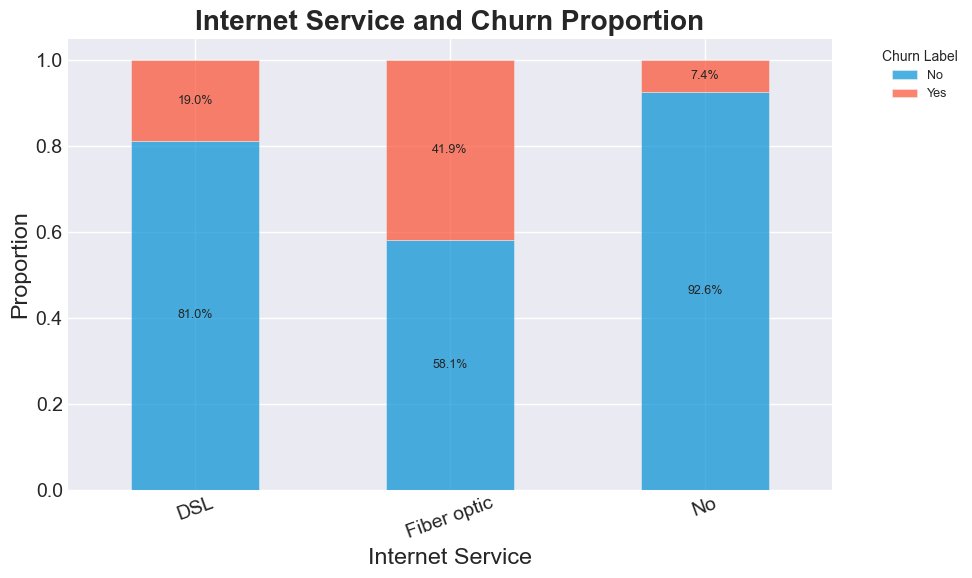

In [36]:
ax = internet_churn_prop.plot(kind='bar', stacked=True, figsize=(10, 6), alpha=0.7)
ax.set_xlabel('Internet Service')
ax.set_ylabel('Proportion')
ax.set_title('Internet Service and Churn Proportion', fontweight='bold')
ax.legend(title='Churn Label', fontsize=9, title_fontsize=10, bbox_to_anchor=(1.05, 1), loc='upper left')

for container in ax.containers:
    labels = [f'{w:.1%}' if (w := v.get_height()) > 0 else '' for v in container]
    ax.bar_label(container, labels=labels, label_type='center', fontsize=9)


plt.xticks(rotation=20)
plt.tight_layout()
plt.show()

Internet service type significantly affects churn. Fiber Optic customers have the highest churn rate (41.9%), while DSL (19.0%) and no internet (7.4%) show lower churn. This suggests that Fiber Optic customers are more at risk, possibly due to service quality or pricing, whereas customers without internet demonstrate strong loyalty.

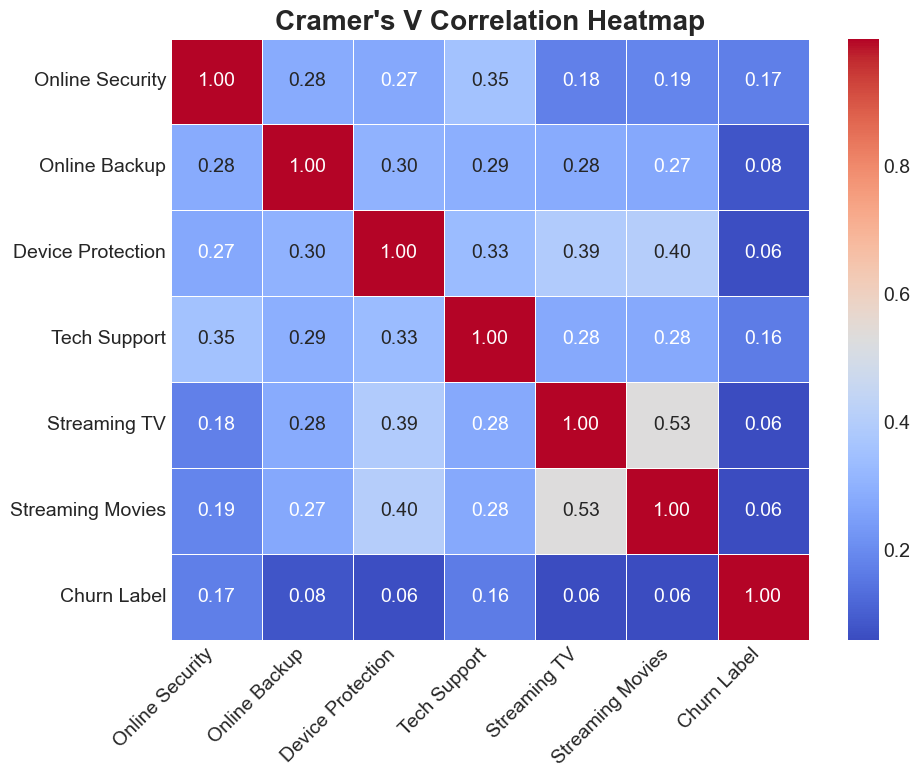

In [37]:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2, _, _, _ = ss.chi2_contingency(confusion_matrix)
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

categorical_cols = ['Online Security', 'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies', 'Churn Label']
cramers_matrix = pd.DataFrame(index=categorical_cols, columns=categorical_cols)

for col1 in categorical_cols:
    for col2 in categorical_cols:
        cramers_matrix.loc[col1, col2] = cramers_v(data[col1], data[col2])

plt.figure(figsize=(10, 8))
sns.heatmap(cramers_matrix.astype(float), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Cramer's V Correlation Heatmap", fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

The choice of internet add-on services shows a positive correlation with churn, particularly for online security and technical support services.

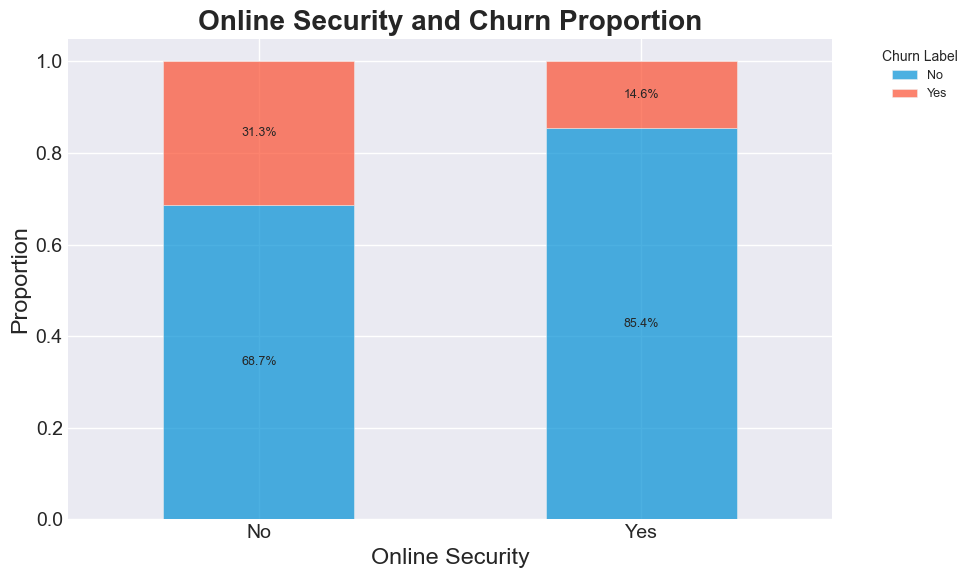

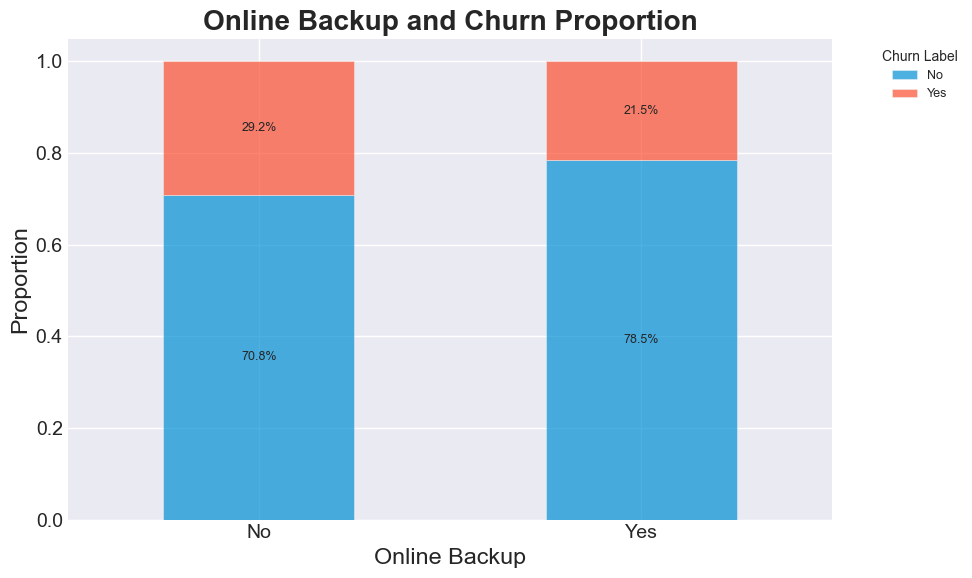

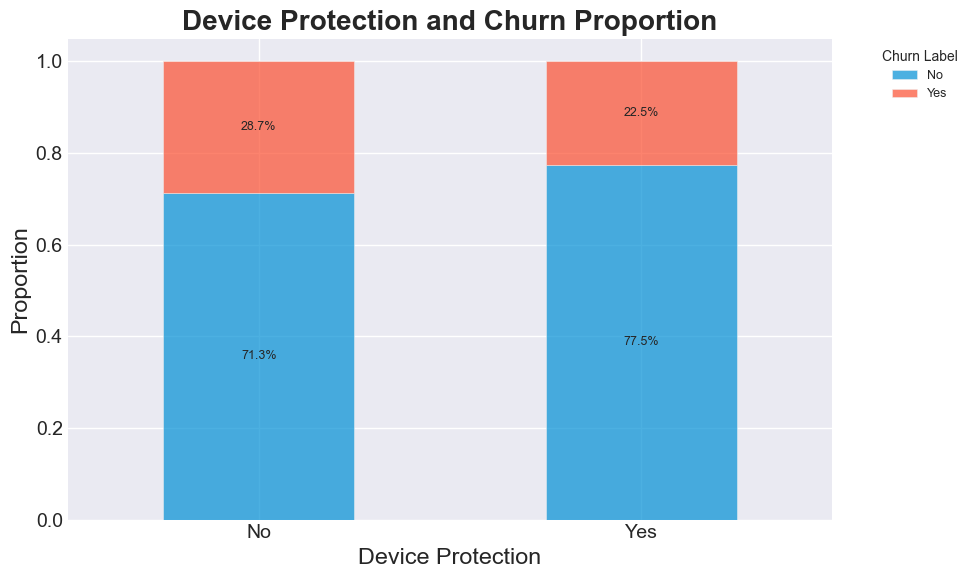

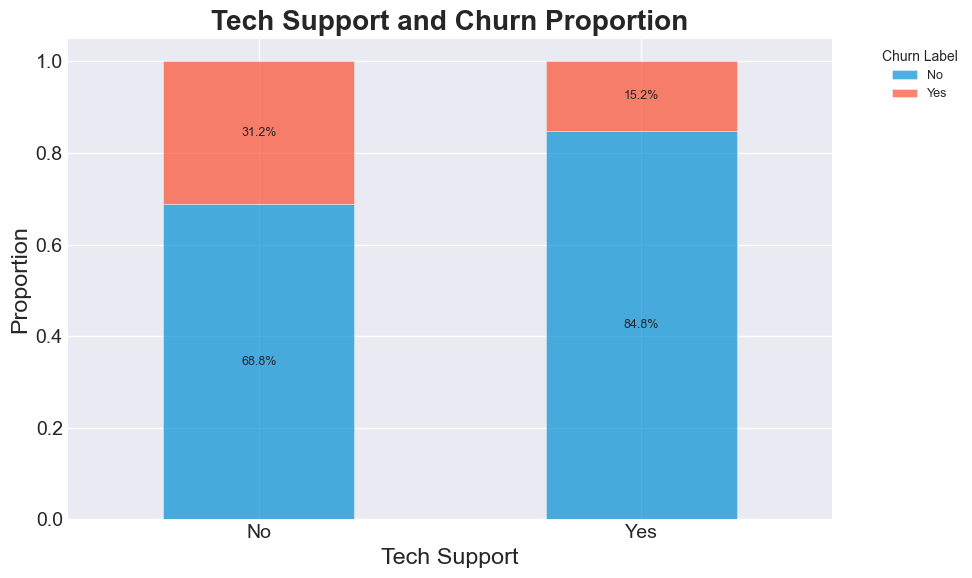

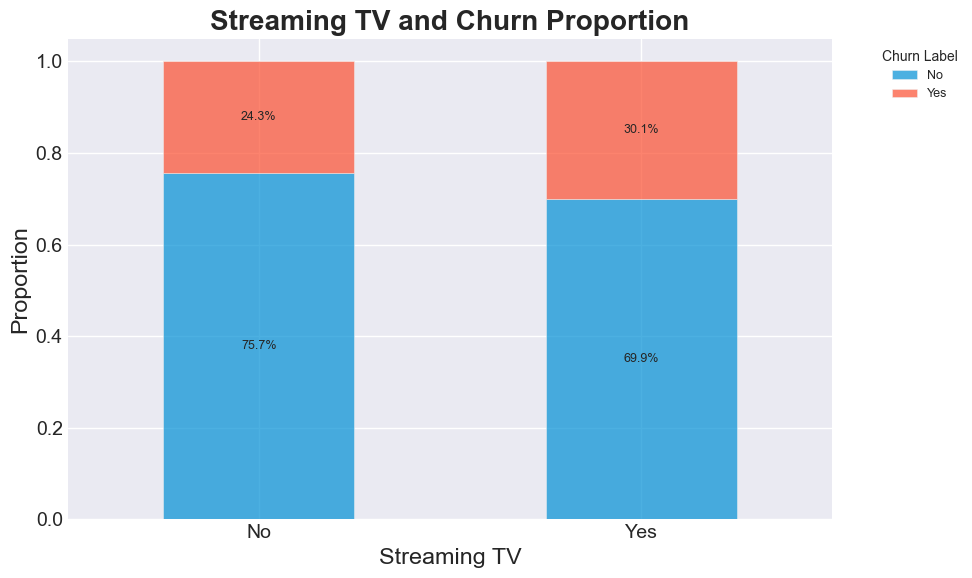

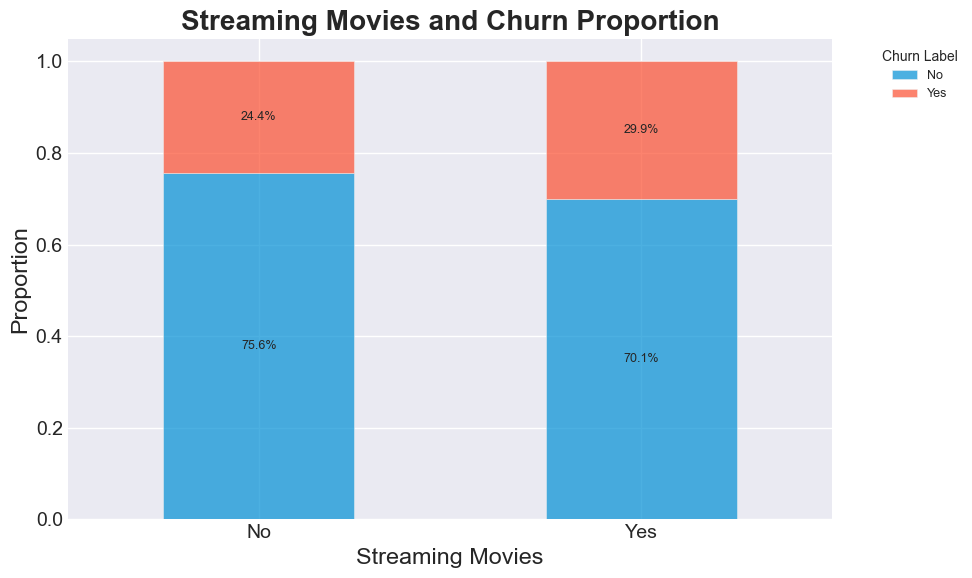

In [38]:
Service_options_kolom = ['Online Security', 'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies']

for col in Service_options_kolom:
    churn_prop = data.groupby([col, 'Churn Label']).size().unstack(fill_value=0)[['No', 'Yes']]
    churn_prop = churn_prop.div(churn_prop.sum(axis=1), axis=0)

    ax = churn_prop.plot(kind='bar', stacked=True, figsize=(10, 6), alpha=0.7)
    ax.set_xlabel(col)
    ax.set_ylabel('Proportion')
    ax.set_title(f'{col} and Churn Proportion', fontweight='bold')
    ax.legend(title='Churn Label', fontsize=9, title_fontsize=10, bbox_to_anchor=(1.05, 1), loc='upper left')

    for container in ax.containers:
        labels = [f'{w:.1%}' if (w := v.get_height()) > 0 else '' for v in container]
        ax.bar_label(container, labels=labels, label_type='center', fontsize=9)

    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()

The visualization confirms that customers not subscribing to online security or technical support exhibit a higher proportion of churn compared to other internet service options.

### 💳 Contract & Payment Behavior

In [39]:
contract_churn = data.groupby(['Contract','Churn Label']).size().unstack(fill_value=0)[['No','Yes']]
contract_churn_prop = contract_churn.div(contract_churn.sum(axis=1), axis=0)

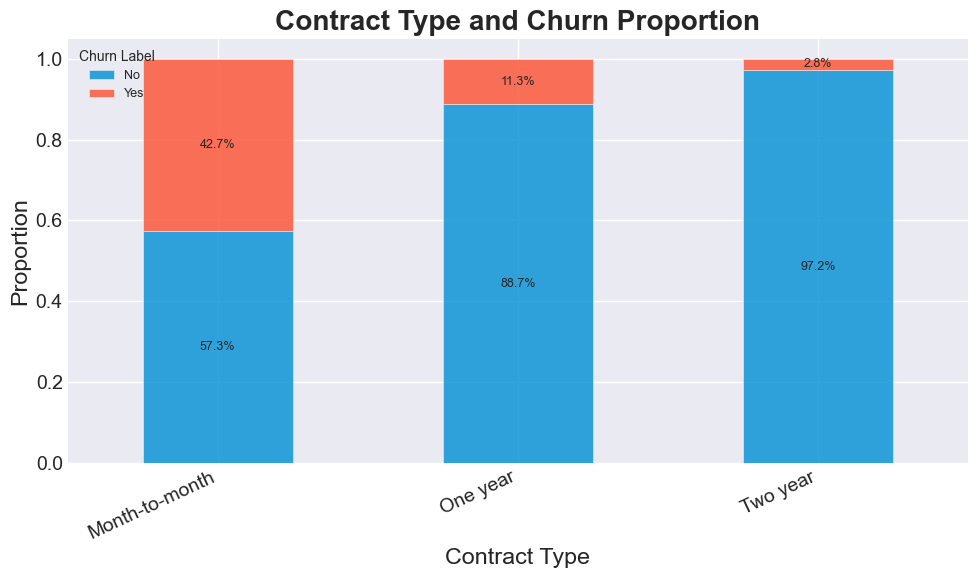

In [40]:
ax = contract_churn_prop.plot(kind='bar', stacked=True, figsize=(10, 6), alpha=0.8)
ax.set_xlabel('Contract Type')
ax.set_ylabel('Proportion')
ax.set_title('Contract Type and Churn Proportion', fontweight='bold')

ax.legend(title='Churn Label', fontsize=9, title_fontsize=10)
for container in ax.containers:
    labels = [f'{w:.1%}' if (w := v.get_height()) > 0 else '' for v in container]
    ax.bar_label(container, labels=labels, label_type='center', fontsize=9)

plt.xticks(rotation=25, ha='right')
plt.tight_layout()
plt.show()

Customers on monthly contracts exhibit higher churn, suggesting that short-term contracts carry greater churn risk compared to longer-term contracts.

⏩ **Payment Method**  
Payment methods are categorized into two types:  
- **Modern Payment**  
- **Non-Modern Payment**

In [41]:
payment_churn = data.groupby(['Payment Method','Churn Label']).size().unstack(fill_value=0)[['No','Yes']]
payment_churn_prop = payment_churn.div(payment_churn.sum(axis=1), axis=0)

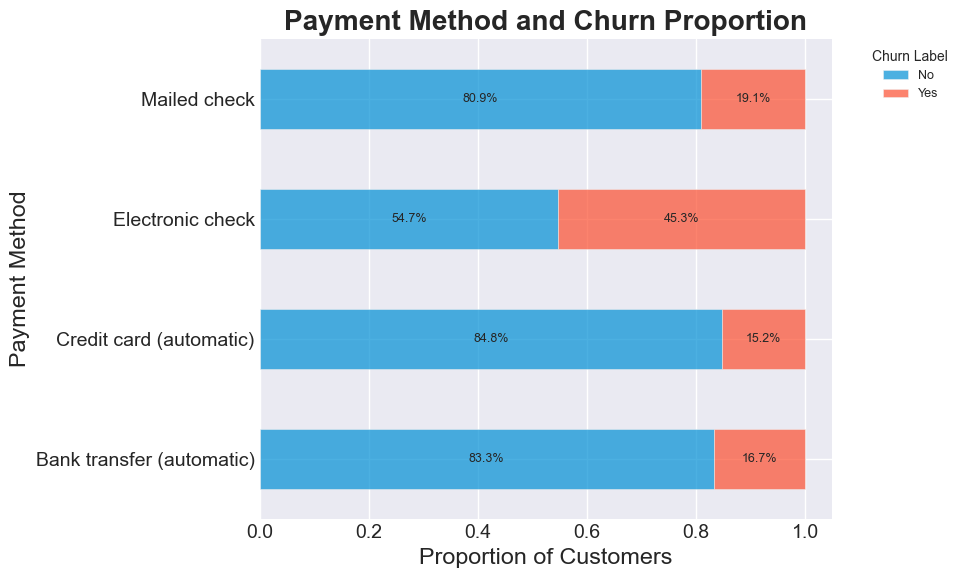

In [42]:
ax = payment_churn_prop.plot(kind='barh', stacked=True, figsize=(10, 6), alpha=0.7)
ax.set_xlabel('Proportion of Customers')
ax.set_ylabel('Payment Method')
ax.set_title('Payment Method and Churn Proportion', fontweight='bold')
ax.legend(title='Churn Label', fontsize=9, title_fontsize=10, bbox_to_anchor=(1.05, 1), loc='upper left')

for container in ax.containers:
    labels = [f'{w:.1%}' if (w := v.get_width()) > 0 else '' for v in container]
    ax.bar_label(container, labels=labels, label_type='center', fontsize=9)


plt.tight_layout()
plt.show()

Electronic check users face higher churn risk, while customers using automatic payments like credit cards or bank transfers show lower churn.

In [43]:
paperles_churn = data.groupby(['Paperless Billing','Churn Label']).size().unstack(fill_value=0)[['No','Yes']]

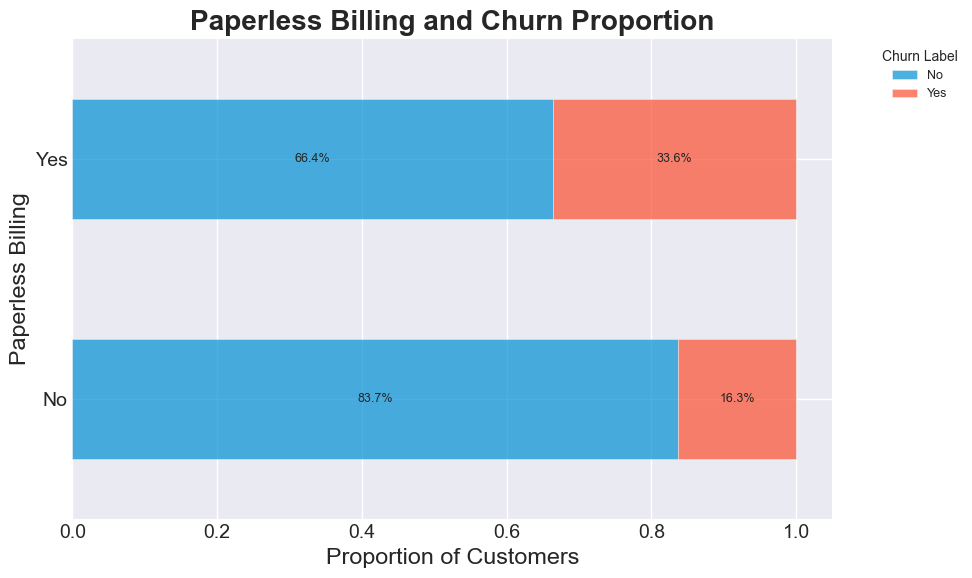

In [44]:
paperless_churn_prop = paperles_churn.div(paperles_churn.sum(axis=1), axis=0)

ax = paperless_churn_prop.plot(kind='barh', stacked=True, figsize=(10, 6), alpha=0.7)
ax.set_xlabel('Proportion of Customers')
ax.set_ylabel('Paperless Billing')
ax.set_title('Paperless Billing and Churn Proportion', fontweight='bold')
ax.legend(title='Churn Label', fontsize=9, title_fontsize=10, bbox_to_anchor=(1.05, 1), loc='upper left')

for container in ax.containers:
    labels = [f'{w:.1%}' if (w := v.get_width()) > 0 else '' for v in container]
    ax.bar_label(container, labels=labels, label_type='center', fontsize=9)

plt.tight_layout()
plt.show()

Customers using paper billing show higher churn risk, while those with modern payment methods are more likely to remain loyal.

### 💰 Financial Factors

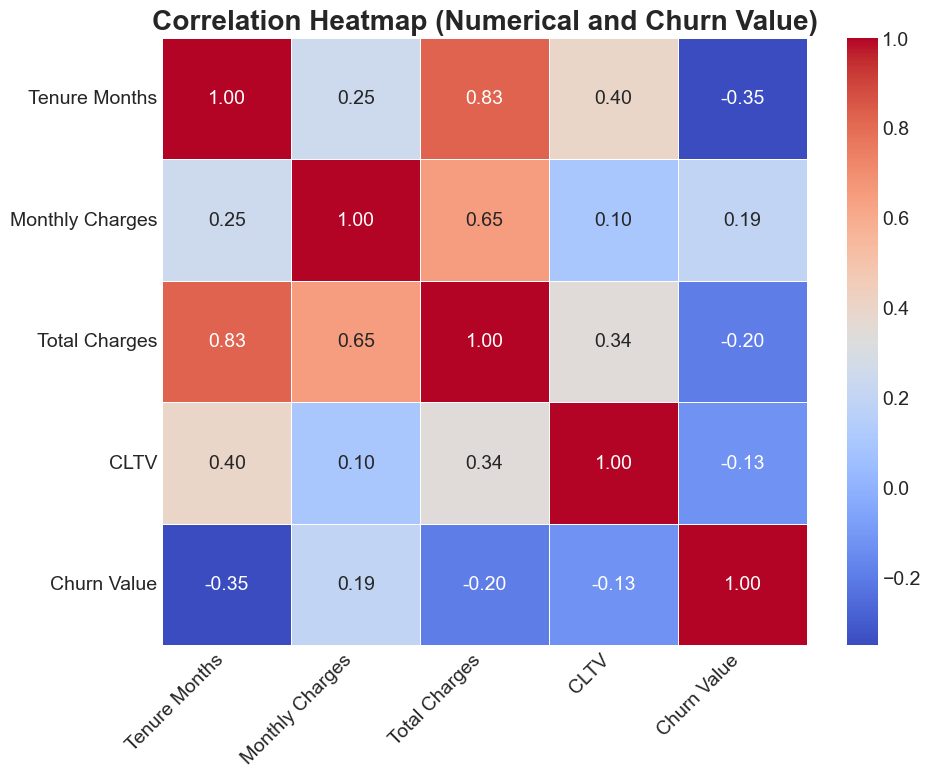

In [45]:
numerical_cols = ['Tenure Months', 'Monthly Charges', 'Total Charges', 'CLTV']
all_cols = numerical_cols + ['Churn Value']

correlation_matrix = pd.DataFrame(index=all_cols, columns=all_cols)

for col1 in all_cols:
    for col2 in all_cols:
        if col1 == 'Churn Value' and col2 in numerical_cols:
            correlation, _ = pointbiserialr(data[col2], data[col1])
            correlation_matrix.loc[col1, col2] = correlation
            correlation_matrix.loc[col2, col1] = correlation
        elif col1 in numerical_cols and col2 == 'Churn Value':
             correlation, _ = pointbiserialr(data[col1], data[col2])
             correlation_matrix.loc[col1, col2] = correlation
             correlation_matrix.loc[col2, col1] = correlation
        elif col1 == col2:
            correlation_matrix.loc[col1, col2] = 1.0
        else:
            # For numerical-numerical correlation, use Pearson (or other appropriate)
            correlation_matrix.loc[col1, col2] = data[col1].corr(data[col2])

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix.astype(float), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap (Numerical and Churn Value)', fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

Heatmap analysis indicates that longer tenure and higher total charges reduce churn risk, while high monthly charges may increase churn, and low CLTV has only a minor effect.

### 🎨 Key Insight

In [50]:
def prep_plot(figsize=(8,4)):
    plt.figure(figsize=figsize)
    plt.grid(axis='y', alpha=0.08)
    plt.title('', fontsize=12)
    plt.xlabel('')
    plt.ylabel('')

def save_and_show(caption=None):
    plt.tight_layout()
    if caption:
        display_markdown = '\n'.join(['**Insight:**', caption])
        from IPython.display import display, Markdown
        display(Markdown(display_markdown))
    plt.show()

**Insight:** Month-to-month contracts show substantially higher churn compared to one-year and two-year contracts. Consider promoting longer contracts with incentives.

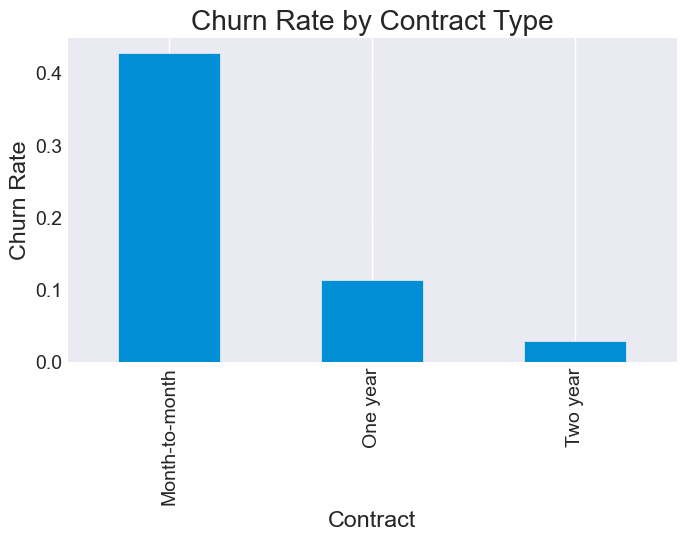

**Insight:** Customers using electronic check have higher churn rates — likely due to failed billing or lower stickiness. Target with billing reminders or switch-to-auto-pay incentives.

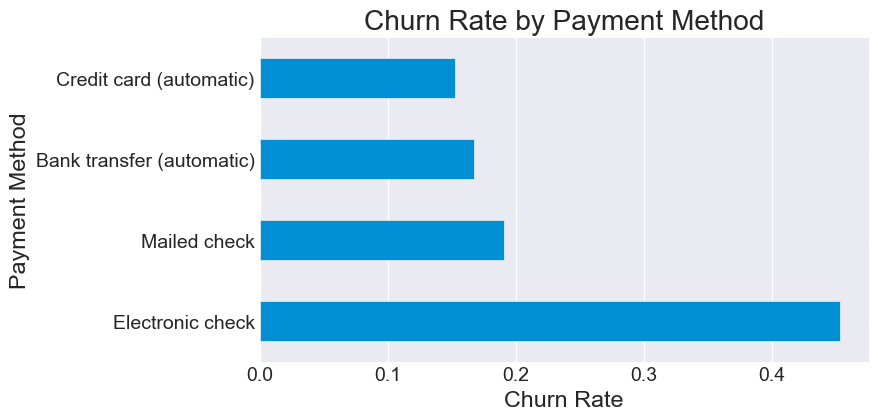

**Insight:** Fiber optic users churn more than DSL or No internet — likely due to price or service quality expectations. Consider targeted retention for fiber customers.

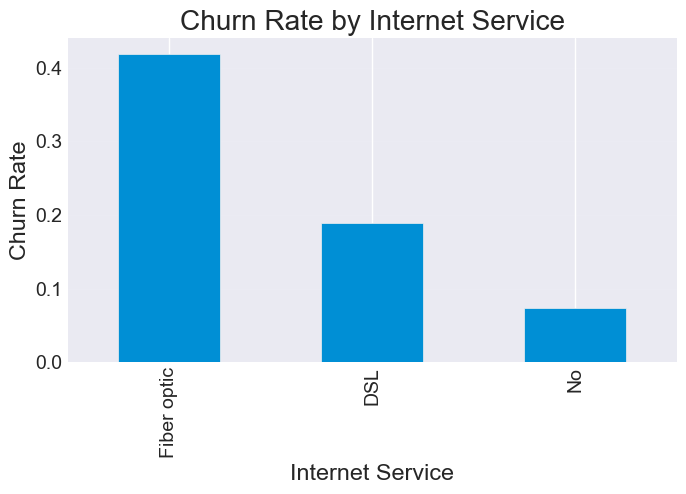

**Insight:** Churners concentrate at low tenure; retention efforts should focus on first 3-6 months.

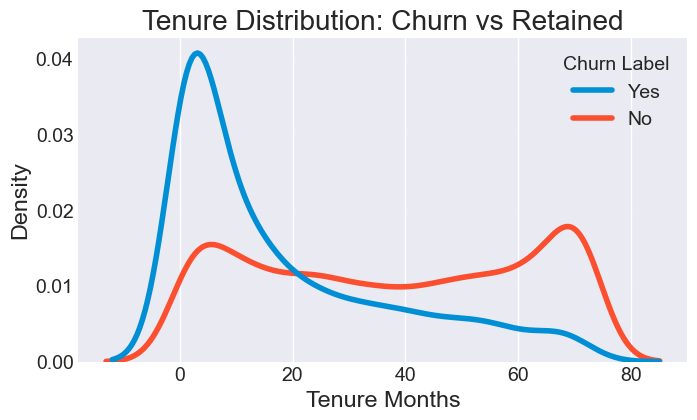

**Insight:** Higher monthly charges correlate with higher churn—consider pricing review or targeted offers for high-bill customers.

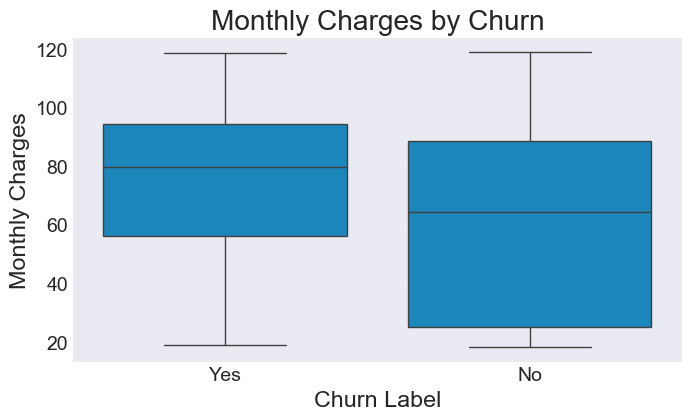

In [51]:
prep_plot = None
def prep_plot(figsize=(8,4)):
    plt.figure(figsize=figsize)
    plt.grid(axis='y', alpha=0.08)

from IPython.display import Markdown, display

# 1) Churn rate by Contract type
prep_plot((7,4))
contract_prop = data.groupby('Contract')['Churn Value'].mean().sort_values(ascending=False)
contract_prop.plot(kind='bar')
plt.title('Churn Rate by Contract Type')
plt.ylabel('Churn Rate')
display(Markdown('**Insight:** Month-to-month contracts show substantially higher churn compared to one-year and two-year contracts. Consider promoting longer contracts with incentives.'))
plt.show()

# 2) Churn by Payment Method
prep_plot((7,4))
pay_prop = data.groupby('Payment Method')['Churn Value'].mean().sort_values(ascending=False)
pay_prop.plot(kind='barh')
plt.title('Churn Rate by Payment Method')
plt.xlabel('Churn Rate')
display(Markdown('**Insight:** Customers using electronic check have higher churn rates — likely due to failed billing or lower stickiness. Target with billing reminders or switch-to-auto-pay incentives.'))
plt.show()

# 3) Internet Service vs Churn
prep_plot((7,4))
isp = data.groupby('Internet Service')['Churn Value'].mean().sort_values(ascending=False)
isp.plot(kind='bar')
plt.title('Churn Rate by Internet Service')
plt.ylabel('Churn Rate')
display(Markdown('**Insight:** Fiber optic users churn more than DSL or No internet — likely due to price or service quality expectations. Consider targeted retention for fiber customers.'))
plt.show()

# 4) Tenure distribution by churn
prep_plot((7,4))
sns.kdeplot(data=data, x='Tenure Months', hue='Churn Label', common_norm=False)
plt.title('Tenure Distribution: Churn vs Retained')
display(Markdown('**Insight:** Churners concentrate at low tenure; retention efforts should focus on first 3-6 months.'))
plt.show()

# 5) Monthly Charges boxplot by churn
prep_plot((7,4))
sns.boxplot(x='Churn Label', y='Monthly Charges', data=data)
plt.title('Monthly Charges by Churn')
display(Markdown('**Insight:** Higher monthly charges correlate with higher churn—consider pricing review or targeted offers for high-bill customers.'))
plt.show()


## 5️⃣ Final Conclusion
The Exploratory Data Analysis of the Telco Customer Churn dataset shows that customer churn is a significant issue for the company, with a churn rate of about 25–27%. The patterns found in the data indicate that churn is not random. Instead, it is strongly influenced by customer behavior, service experience, and competitive pressure.

One of the most important findings is that customers with short tenure and those who use month-to-month contracts are much more likely to churn. These customers have low commitment and are more sensitive to service quality and pricing. In addition, customers who pay using electronic checks show a higher churn rate, suggesting that this group may be more cost-conscious or more likely to compare services across providers.

Service-related factors also play an important role. Customers using Fiber Optic service have a higher tendency to churn compared to DSL users, which may indicate issues with network performance or customer expectations. While higher monthly charges appear to increase churn slightly, price alone is not the main reason customers leave.

The chi-square test results confirm that several categorical features such as Contract, Internet Service, Senior Citizen, and Payment Method have a statistically significant relationship with churn.

Furthermore, the analysis of Churn Reasons provides clear and actionable insights. The most common reasons customers leave are related to poor customer support and better offers from competitors, including faster internet speeds, more data, and improved device options. This shows that the company’s challenges come not only from internal service quality, but also from strong competition in the telecom market.

Overall, the churn problem is driven by a combination of customer experience issues, service reliability, and external competition. To reduce churn, the company must improve its customer support, strengthen service performance, and create more competitive pricing or contract options., who often show unstable behavior, and senior customers. Ultimately, understanding churn is not just about identifying who leaves, but about finding ways to keep customers wanting to stay.